# TWITTER SENTIMENT ANALYSIS USING ML

## Importing libraries for scraping

In [1]:
import GetOldTweets3 as got
import pandas as pd
import numpy as np

## Importing libraries for data cleaning(NLP)

In [2]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
import re
import string
import seaborn as sns
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing libraries for graph ploting

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib notebook

## Importing free machine learning libraries

In [5]:
import sklearn
from sklearn.utils import shuffle 
from sklearn.feature_extraction.text import TfidfVectorizer

## Word2vec gensim libraries

In [6]:
import gensim
from gensim.models import Word2Vec
from gensim.models import keyedvectors
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import train_test_split

### Version check

In [8]:
print(matplotlib.__version__)
print(sns.__version__)
print(got.__version__)
print(np.__version__)
print(pd.__version__)
print(nltk.__version__)

3.0.2
0.9.0
0.0.11
1.15.4
0.23.4
3.4


### Working directory

In [9]:
pwd

'C:\\Users\\ayush'

# data scraping

### Real time connection through twitter

In [10]:
# Function that pulls tweets based on a general search query and turns to csv file

# Parameters: (text query you want to search), (max number of most recent tweets to pull from)
def text_query_to_csv(text_query, count):
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                                .setMaxTweets(count)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    # Creating list of chosen tweet data
    text_tweets = [[tweet.date, tweet.text] for tweet in tweets]

    # Creation of dataframe from tweets
    tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text'])

    # Converting tweets dataframe to csv file
    tweets_df.to_csv('{}-{}k-tweets.csv'.format(text_query, int(count/1000)), sep=',')

### Data Extraction

In [ ]:
# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
text_query = 'CAA_NRC'
count = 100000
# Calling function to query X amount of relevant tweets and create a CSV file
text_query_to_csv(text_query, count)

##### loading data into df

In [13]:
df = pd.read_csv("CAA_NRC-100k-tweets.csv")

In [17]:
df.head()

,Unnamed: 0,Datetime,Text
0,0,2020-03-12 20:55:50+00:00,NOT WEDDING BELLS;BUT WEDDING DRUMS We've all ...
1,1,2020-03-12 20:55:21+00:00,Giving a slight info will backfire. Please #Sp...
2,2,2020-03-12 20:54:35+00:00,My husband obviously has not learnt how to tra...
3,3,2020-03-12 20:52:25+00:00,LIKE JILL's...sorry HILL's... HIS PRIVATE SERV...
4,4,2020-03-12 20:51:19+00:00,BOTH HID SOMETHING VERY .. R.E.V.E.A.L.I.N.G


In [18]:
df

,Unnamed: 0,Datetime,Text
0,0,2020-03-12 20:55:50+00:00,NOT WEDDING BELLS;BUT WEDDING DRUMS We've all ...
1,1,2020-03-12 20:55:21+00:00,Giving a slight info will backfire. Please #Sp...
2,2,2020-03-12 20:54:35+00:00,My husband obviously has not learnt how to tra...
3,3,2020-03-12 20:52:25+00:00,LIKE JILL's...sorry HILL's... HIS PRIVATE SERV...
4,4,2020-03-12 20:51:19+00:00,BOTH HID SOMETHING VERY .. R.E.V.E.A.L.I.N.G
5,5,2020-03-12 20:50:29+00:00,"Mr Rajdeep Sardesai, hold on. Come to South. I..."
6,6,2020-03-12 20:50:13+00:00,"WOMEN, WOMEN, WOMEN..... A husband & wife were..."
7,7,2020-03-12 20:49:58+00:00,nrc aya nay aya caa padega to smjhega na caa n...
8,8,2020-03-12 20:48:37+00:00,#NPR_ही_NRC_है? Can #Modi #AmitShah declaratio...
9,9,2020-03-12 20:48:28+00:00,"अगर ऐसा है तो CAA, NRC, NPR वापस करके देख लो औ..."


In [19]:
df.columns #Column status

Index(['Unnamed: 0', 'Datetime', 'Text'], dtype='object')

In [20]:
df.isnull().any()  #Checking for empty row in boolean form

Unnamed: 0    False
Datetime      False
Text           True
dtype: bool

In [21]:
df.isnull().sum() #Checking for empty row in number form

Unnamed: 0       0
Datetime         0
Text          1010
dtype: int64

#### Removing empty rows and storing new data into df1

In [22]:

df1 = df.dropna(how='any')


In [23]:
df1

,Unnamed: 0,Datetime,Text
0,0,2020-03-12 20:55:50+00:00,NOT WEDDING BELLS;BUT WEDDING DRUMS We've all ...
1,1,2020-03-12 20:55:21+00:00,Giving a slight info will backfire. Please #Sp...
2,2,2020-03-12 20:54:35+00:00,My husband obviously has not learnt how to tra...
3,3,2020-03-12 20:52:25+00:00,LIKE JILL's...sorry HILL's... HIS PRIVATE SERV...
4,4,2020-03-12 20:51:19+00:00,BOTH HID SOMETHING VERY .. R.E.V.E.A.L.I.N.G
5,5,2020-03-12 20:50:29+00:00,"Mr Rajdeep Sardesai, hold on. Come to South. I..."
6,6,2020-03-12 20:50:13+00:00,"WOMEN, WOMEN, WOMEN..... A husband & wife were..."
7,7,2020-03-12 20:49:58+00:00,nrc aya nay aya caa padega to smjhega na caa n...
8,8,2020-03-12 20:48:37+00:00,#NPR_ही_NRC_है? Can #Modi #AmitShah declaratio...
9,9,2020-03-12 20:48:28+00:00,"अगर ऐसा है तो CAA, NRC, NPR वापस करके देख लो औ..."


In [24]:
df1.isnull().sum()  #Again confirming for empty row

Unnamed: 0    0
Datetime      0
Text          0
dtype: int64

#### Removing unwanted column and storing new set of data into df2

In [25]:
df2 = df1.drop(['Unnamed: 0','Datetime'], axis = 1 )

#### Removing all duplicate texts

In [26]:
df2.duplicated().any()  #Checking for duplicate texts

True

In [27]:
df2.duplicated().sum()  #Getting the counts of duplicate texts

16291

#### Removing duplicate values

In [28]:
df2 = df2.drop_duplicates(subset=None, keep=False, inplace=False)

In [29]:
df2.duplicated().sum()  #Again confirming for duplicate texts

0

In [30]:
df2

,Text
0,NOT WEDDING BELLS;BUT WEDDING DRUMS We've all ...
1,Giving a slight info will backfire. Please #Sp...
2,My husband obviously has not learnt how to tra...
3,LIKE JILL's...sorry HILL's... HIS PRIVATE SERV...
4,BOTH HID SOMETHING VERY .. R.E.V.E.A.L.I.N.G
5,"Mr Rajdeep Sardesai, hold on. Come to South. I..."
6,"WOMEN, WOMEN, WOMEN..... A husband & wife were..."
7,nrc aya nay aya caa padega to smjhega na caa n...
8,#NPR_ही_NRC_है? Can #Modi #AmitShah declaratio...
9,"अगर ऐसा है तो CAA, NRC, NPR वापस करके देख लो औ..."


In [31]:
df2['Text'] = df2['Text'].apply(lambda x: x.lower())  #Applying smart lower case

In [32]:
df2

,Text
0,not wedding bells;but wedding drums we've all ...
1,giving a slight info will backfire. please #sp...
2,my husband obviously has not learnt how to tra...
3,like jill's...sorry hill's... his private serv...
4,both hid something very .. r.e.v.e.a.l.i.n.g
5,"mr rajdeep sardesai, hold on. come to south. i..."
6,"women, women, women..... a husband & wife were..."
7,nrc aya nay aya caa padega to smjhega na caa n...
8,#npr_ही_nrc_है? can #modi #amitshah declaratio...
9,"अगर ऐसा है तो caa, nrc, npr वापस करके देख लो औ..."


In [33]:
df2.duplicated().sum()

104

#### Data Preprocessing

In [34]:
df2['Text'] = df2['Text'].apply(lambda x: x.translate(str.maketrans('','',"!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~")))

In [35]:
#remove digits
df2['Text'] = df2['Text'].map(lambda x: re.sub(r'\d+', ' ', x))

In [36]:
# Remove words which is less then 3
df2['Text'] = df2['Text'].map(lambda x: re.sub(r'\b\w{1,2}\b', ' ', x))

In [37]:
# Remove links
TEXT_CLEANING_RE = "https?:\S+|http?:\S|[^A-Za-z0-9]+"
df2['Text'] = df2['Text'].map(lambda x: re.sub(TEXT_CLEANING_RE, ' ', x))

In [38]:
# Remove white spaces
df2['Text'] = df2['Text'].map(lambda x: x.strip())

In [39]:
df2

,Text
0,not wedding bellsbut wedding drums all seen so...
1,giving slight info will backfire please spread...
2,husband obviously has not learnt how train his...
3,like jill ssorry hill his private server went ...
4,both hid something very revealing
5,rajdeep sardesai hold come south wil give hund...
6,women women women husband wife were always fig...
7,nrc aya nay aya caa padega smjhega caa nrc jod...
8,npr nrc can modi amitshah declaration parliame...
9,caa nrc npr


In [40]:
df2.duplicated().sum()

14381

In [41]:
df2 = df2.drop_duplicates(subset=None, keep=False, inplace=False)

In [42]:
df2.duplicated().sum()

0

In [43]:
df2

,Text
0,not wedding bellsbut wedding drums all seen so...
1,giving slight info will backfire please spread...
2,husband obviously has not learnt how train his...
3,like jill ssorry hill his private server went ...
4,both hid something very revealing
5,rajdeep sardesai hold come south wil give hund...
6,women women women husband wife were always fig...
7,nrc aya nay aya caa padega smjhega caa nrc jod...
8,npr nrc can modi amitshah declaration parliame...
10,shit flow chart


In [44]:
df2.to_csv('hoo123 data.csv')

In [45]:
tokenizer = RegexpTokenizer(r'\w+')

In [46]:
df2['Text']=df2['Text'].apply(lambda x : tokenizer.tokenize(x.lower()))
df2['Text'].head(20)

C:\Users\ayush\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0     [not, wedding, bellsbut, wedding, drums, all, ...
1     [giving, slight, info, will, backfire, please,...
2     [husband, obviously, has, not, learnt, how, tr...
3     [like, jill, ssorry, hill, his, private, serve...
4               [both, hid, something, very, revealing]
5     [rajdeep, sardesai, hold, come, south, wil, gi...
6     [women, women, women, husband, wife, were, alw...
7     [nrc, aya, nay, aya, caa, padega, smjhega, caa...
8     [npr, nrc, can, modi, amitshah, declaration, p...
10                                  [shit, flow, chart]
11           [that, good, the, cesspit, being, cleared]
13    [its, the, touching, equipment, fluids, exchange]
15                    [modi, coronavirus, digitalindia]
16    [guys, urself, are, misguided, one, worried, a...
17                                         [pk, caanrc]
18    [abey, dhakkan, caa, nrc, cheen, raha, hai, te...
19    [izzat, izzat, milegi, haisiyat, kisi, dekh, h...
22    [stop, deoband, women, protest, police, ta

In [47]:
# Remove non alphabetic tokens
df2['Text'] = df2['Text'].map(lambda x: [word for word in x if word.isalpha()])

C:\Users\ayush\Anaconda31\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
def r_s(text):
    word = [w for w in text if w not in stopwords.words('english')]
    return word

In [49]:
df2['Text']=df2['Text'].apply(lambda x : r_s(x))
df2['Text'].head(10)

C:\Users\ayush\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0     [wedding, bellsbut, wedding, drums, seen, drun...
1     [giving, slight, info, backfire, please, sprea...
2     [husband, obviously, learnt, train, lmao, time...
3     [like, jill, ssorry, hill, private, server, we...
4                           [hid, something, revealing]
5     [rajdeep, sardesai, hold, come, south, wil, gi...
6     [women, women, women, husband, wife, always, f...
7     [nrc, aya, nay, aya, caa, padega, smjhega, caa...
8     [npr, nrc, modi, amitshah, declaration, parlia...
10                                  [shit, flow, chart]
Name: Text, dtype: object

In [50]:
df2

,Text
0,"[wedding, bellsbut, wedding, drums, seen, drun..."
1,"[giving, slight, info, backfire, please, sprea..."
2,"[husband, obviously, learnt, train, lmao, time..."
3,"[like, jill, ssorry, hill, private, server, we..."
4,"[hid, something, revealing]"
5,"[rajdeep, sardesai, hold, come, south, wil, gi..."
6,"[women, women, women, husband, wife, always, f..."
7,"[nrc, aya, nay, aya, caa, padega, smjhega, caa..."
8,"[npr, nrc, modi, amitshah, declaration, parlia..."
10,"[shit, flow, chart]"


In [51]:
# Word Lemmatization
lem = WordNetLemmatizer()
df2['Text'] = df2['Text'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

C:\Users\ayush\Anaconda31\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
df2['Text'] = df2['Text'].map(lambda x: ' '.join(x))

C:\Users\ayush\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
df2

,Text
0,wed bellsbut wed drum see drink groom get fumb...
1,give slight info backfire please spreadtheword...
2,husband obviously learn train lmao time much s...
3,like jill ssorry hill private server go pub hi...
4,hide something reveal
5,rajdeep sardesai hold come south wil give hund...
6,women women women husband wife always fight co...
7,nrc aya nay aya caa padega smjhega caa nrc jod...
8,npr nrc modi amitshah declaration parliament c...
10,shit flow chart


In [54]:
df2['pre_clean_len'] = [len(t) for t in df2.Text]

C:\Users\ayush\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


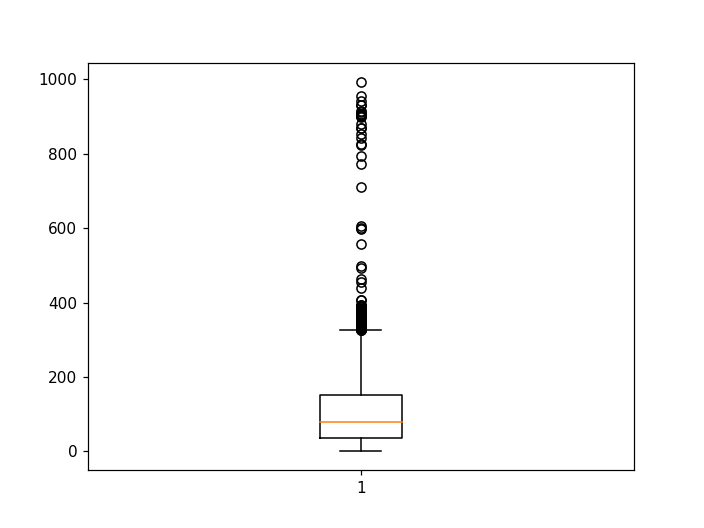

In [55]:
fig=plt.figure()
plt.boxplot(df2.pre_clean_len)
plt.show()

In [56]:
from textblob import TextBlob
df2 = df2[['Text']].sample(63627)
def detect_polarity(Text):
    return TextBlob(Text).sentiment.polarity
df2['polarity'] = df2.Text.apply(detect_polarity)
df2.head(20)

,Text,polarity
72714,salute peoplehumanity laalnoor delhiburning de...,0.000000
92014,india want hand next generation bjp nefarious ...,0.000000
91025,caa httpsyoutubegnddwu via youtube jafrabad ja...,0.000000
67967,within first tweet understand caanrc consider ...,0.225000
99545,sev tamataror bhakh,0.000000
74431,thank honor tag ritag uttrashada meenakshishar...,0.000000
48618,listen full video caanrcprotests,0.350000
39266,caanrcnpr sab sidha kar dega sab jayenge bhara...,0.000000
37931,unhumanrights ever attempt implead case countr...,-0.071429
98153,great aim struggle liberty equality law shop h...,0.800000


In [57]:
df2

,Text,polarity
72714,salute peoplehumanity laalnoor delhiburning de...,0.000000
92014,india want hand next generation bjp nefarious ...,0.000000
91025,caa httpsyoutubegnddwu via youtube jafrabad ja...,0.000000
67967,within first tweet understand caanrc consider ...,0.225000
99545,sev tamataror bhakh,0.000000
74431,thank honor tag ritag uttrashada meenakshishar...,0.000000
48618,listen full video caanrcprotests,0.350000
39266,caanrcnpr sab sidha kar dega sab jayenge bhara...,0.000000
37931,unhumanrights ever attempt implead case countr...,-0.071429
98153,great aim struggle liberty equality law shop h...,0.800000


In [58]:
df2['polarity']=df2['polarity'].map(lambda x: 1 if x > 0.25 else -1 if x < -0.25 else 0)
df2

,Text,polarity
72714,salute peoplehumanity laalnoor delhiburning de...,0
92014,india want hand next generation bjp nefarious ...,0
91025,caa httpsyoutubegnddwu via youtube jafrabad ja...,0
67967,within first tweet understand caanrc consider ...,0
99545,sev tamataror bhakh,0
74431,thank honor tag ritag uttrashada meenakshishar...,0
48618,listen full video caanrcprotests,1
39266,caanrcnpr sab sidha kar dega sab jayenge bhara...,0
37931,unhumanrights ever attempt implead case countr...,0
98153,great aim struggle liberty equality law shop h...,1


## Data visulization

<IPython.core.display.Javascript object>


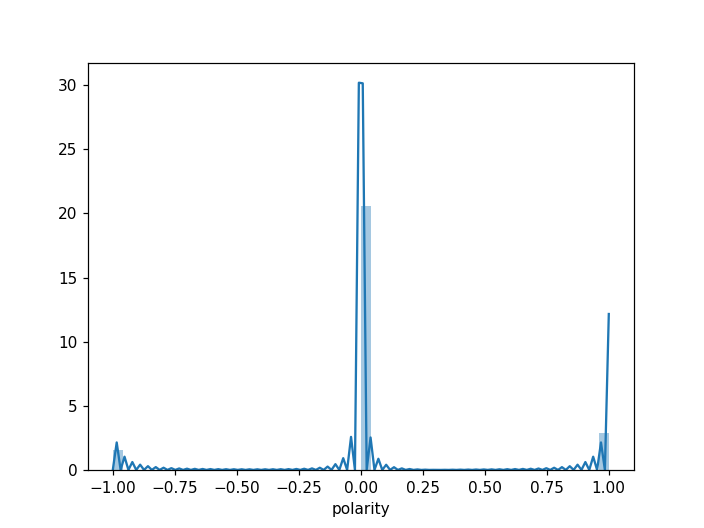

C:\Users\ayush\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [59]:
fig=plt.figure()
sns.distplot(df2['polarity'])

<IPython.core.display.Javascript object>


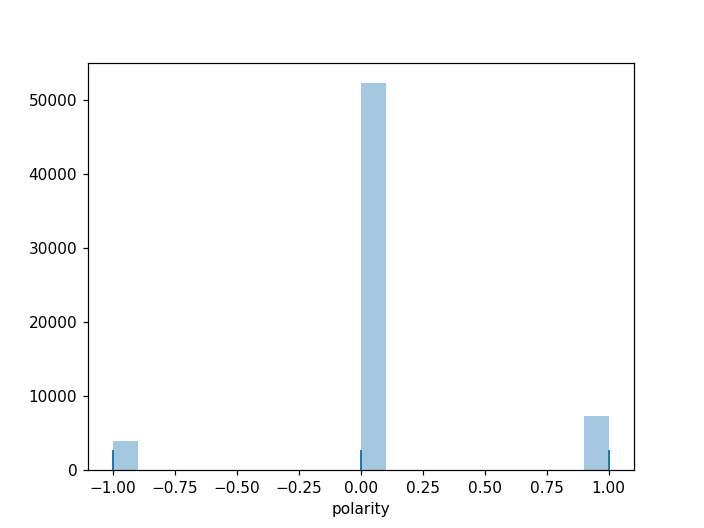

In [55]:
fig=plt.figure()
sns.distplot(df2['polarity'],bins=20,kde=False,rug=True);

## Word2vec

In [60]:
Vec=df2["Text"].values
Vec

array(['salute peoplehumanity laalnoor delhiburning delhicaaclashes caanrcprotests',
       'india want hand next generation bjp nefarious design want makeus second class citizens stateless country oppose stand protest caanrcnpr children future mainbhiowaisi',
       'caa httpsyoutubegnddwu via youtube jafrabad jaffrabad caanrcnpr caanrcprotests',
       ..., 'worst actors promote plain boycott grow spine',
       'shaheenbagh caanrcnpr amanatullakhan shaheenbagh swamy asadowaisi lambaalka mamataofficial shashitharoor sitaramyechury',
       'caa nrc bare keya keh reh sushant shing'], dtype=object)

In [61]:
Main_Vec = [nltk.word_tokenize(text) for text in Vec]

In [62]:
Main_Vec

[['salute',
  'peoplehumanity',
  'laalnoor',
  'delhiburning',
  'delhicaaclashes',
  'caanrcprotests'],
 ['india',
  'want',
  'hand',
  'next',
  'generation',
  'bjp',
  'nefarious',
  'design',
  'want',
  'makeus',
  'second',
  'class',
  'citizens',
  'stateless',
  'country',
  'oppose',
  'stand',
  'protest',
  'caanrcnpr',
  'children',
  'future',
  'mainbhiowaisi'],
 ['caa',
  'httpsyoutubegnddwu',
  'via',
  'youtube',
  'jafrabad',
  'jaffrabad',
  'caanrcnpr',
  'caanrcprotests'],
 ['within',
  'first',
  'tweet',
  'understand',
  'caanrc',
  'consider',
  'delhi',
  'riot',
  'one',
  'part',
  'hindutva',
  'agenda',
  'union',
  'government',
  'push',
  'oliver',
  'absolutely',
  'correct'],
 ['sev', 'tamataror', 'bhakh'],
 ['thank',
  'honor',
  'tag',
  'ritag',
  'uttrashada',
  'meenakshisharan',
  'anju',
  'purohit',
  'wetwokrishna',
  'hemalathanarne',
  'vandanajayrajan',
  'mini',
  'moulii',
  'paperrose',
  'shytigress',
  'nairhena',
  'rajeiyer',
  

In [63]:
model=Word2Vec(Main_Vec,min_count=1,size=32)

In [64]:
model.most_similar('support')

C:\Users\ayush\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('oppose', 0.9180153608322144),
 ('strongly', 0.8903584480285645),
 ('form', 0.8815685510635376),
 ('fully', 0.8776116371154785),
 ('clear', 0.8773874640464783),
 ('supporter', 0.8753776550292969),
 ('problem', 0.8642401695251465),
 ('etc', 0.8634528517723083),
 ('agenda', 0.8622050285339355),
 ('favor', 0.8571723699569702)]

In [65]:
model.most_similar('india')

C:\Users\ayush\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('world', 0.8663684129714966),
 ('nation', 0.8610087633132935),
 ('democracy', 0.8608448505401611),
 ('country', 0.8583864569664001),
 ('state', 0.8418287038803101),
 ('divisive', 0.8408671617507935),
 ('normalize', 0.8345885276794434),
 ('religious', 0.8325963020324707),
 ('freedom', 0.8324557542800903),
 ('onslaught', 0.8308037519454956)]

## Count classifiers

In [66]:
X = df2.Text # get all the text in x variable
y = df2.polarity # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y
from collections import Counter
print(set(y)) # equals to list(set(words))
print(Counter(y).values()) #

(63627,)
(63627,)
{0, 1, -1}
dict_values([52383, 7314, 3930])


## APPLYING TRAIN AND TEST SPLIT

In [67]:
#from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1,stratify=y) # split the data into traing and testing set where ratio is 80:20
print("TRAIN size:", len(X_train))
print("TEST size:", len(X_test))

TRAIN size: 50901
TEST size: 12726


In [68]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3))

## fit or training data tweets to vect

In [69]:
vect.fit(X_train) 
X_train_dtm = vect.transform(X_train) 

###### transform our testing data tweets

In [70]:
X_test_dtm = vect.transform(X_test)

## SUPPORT VECTOR MACHINE (SVM) ALGORITHMS¶

In [71]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [72]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [73]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.8821240798081865

In [74]:
y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [75]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_svm)  # measure the accuracy of our model on the testing data

0.907040704070407

In [76]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_svm)# plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[ 442,  342,    2],
       [ 189, 9980,  308],
       [   1,  341, 1121]], dtype=int64)

## Naive Bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

In [78]:
nb.fit(X_train_dtm, y_train)# fit our both training data tweets as well as their sentiments to the multinomial naive bayes model

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [79]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.8232844324950627

predict the sentiments of testing data tweets

In [80]:
y_pred_nb = nb.predict(X_test_dtm)

measure the accuracy of our model on the testing data

In [81]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb) 

0.8232751846613233

##### plot the confusion matrix between our predicted sentiments and the original testing data sentiments

In [82]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_nb) 

array([[    0,   786,     0],
       [    0, 10477,     0],
       [    0,  1463,     0]], dtype=int64)

# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(random_state = 100, max_depth=3, min_samples_leaf=5)

In [84]:
clf_dtc.fit(X_train_dtm, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [85]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf_dtc, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean()

0.8402391925468464

In [86]:
y_pred_dtc = clf_dtc.predict(X_test_dtm)

In [87]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_dtc) 

0.841034103410341

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dtc)

array([[    0,   785,     1],
       [    0, 10423,    54],
       [    0,  1183,   280]], dtype=int64)

# Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [90]:
clf_rf.fit(X_train_dtm, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf_rf, X = X_train_dtm, y = y_train, cv = 3)
accuracies.mean()

In [ ]:
y_pred_rf = clf_rf.predict(X_test_dtm)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_rf)

## Finished

In [ ]:
#model = keyedvectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True,limit=100000)

In [63]:
#!pip install keyedvectors from gensim